In [1]:
%cd ..

/Users/lukakarginov/Documents/Dar Lab/scnnoise


In [2]:
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA

In [3]:
from scnnoise import _scnnoise
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import src.scnnoise.CellType as ct
import src.scnnoise.LTSim as lt

<h1>Testing LTSim</h1>

# Exp 1: Constitutive Expression

In [4]:
cell_type_csv = 'data/toy_data/two_gene_cell_types_constitutive.csv'
c4 = ct.CellType(4,cell_type_csv,[]) #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4]) 
c2 = ct.CellType(2,cell_type_csv,[]) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3]) 
 
c1.children[1].children[0].lineageName #should output 4
c4.rxn_rates

{'A': {'transcription': 0.354048964,
  'mRNA decay': 0.00245,
  'translation': 0.00294,
  'protein decay': 0.003},
 'B': {'transcription': 0.354048964,
  'mRNA decay': 0.00245,
  'translation': 0.00294,
  'protein decay': 0.003}}

In [5]:
sim1  = lt.LTSim(c1, 2, gene_csv='data/toy_data/two_gene_constitutive.csv', mol_csv ='data/toy_data/two_gene_constitutive_molecule_count.csv',count_csv = 'count.csv',sample_csv = 'Exp1/samples.csv', molecule = "mRNA")

In [6]:
data = sim1.sim_LT(100)

1T
1
2T
2
3T
3
4T
4


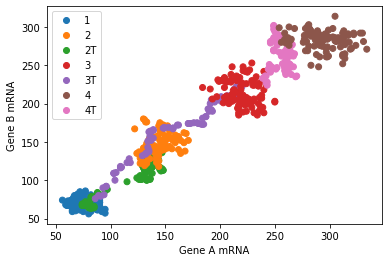

In [7]:
#scatter of 2 genes
plt.scatter(
     data[data.columns[0]],
     data[data.columns[1]],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x],lw = 0, marker = "o") for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)
plt.ylabel('Gene B mRNA')
plt.xlabel('Gene A mRNA')
plt.savefig('Exp1/Constitutive_mRNA.pdf')

In [8]:
sim1  = lt.LTSim(c1, 2, gene_csv='data/toy_data/two_gene_constitutive.csv', mol_csv ='data/toy_data/two_gene_constitutive_molecule_count.csv',count_csv = 'count.csv',sample_csv = 'Exp1/samplesProt.csv', molecule = "protein")

In [9]:
data = sim1.sim_LT(100)

1T
1
2T
2
3T
3
4T
4


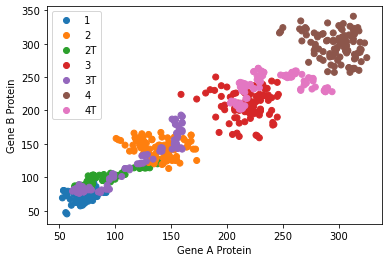

In [10]:
#scatter of 2 genes
plt.scatter(
     data[data.columns[0]],
     data[data.columns[1]],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x],lw = 0, marker = "o") for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)
plt.ylabel('Gene B Protein')
plt.xlabel('Gene A Protein')
plt.savefig('Exp1/Constitutive_prot.pdf')

In [11]:
for i in range(4):
    print(np.mean(data[data[data.columns[2]] == str(i+1)][data.columns[0]]))

72.22
138.11
218.39
297.24


# Exp1: 2 State Model

<h2>2 Genes Protein</h2>

In [12]:
### Testing cellType creation
cell_type_csv = 'data/toy_data/two_gene_cell_types.csv'
c4 = ct.CellType(4,cell_type_csv,[]) #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4]) 
c2 = ct.CellType(2,cell_type_csv,[]) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3]) 
 
c1.children[1].children[0].lineageName #should output 4
c4.rxn_rates


{'A': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 8.0,
  'mRNA decay': 0.00245,
  'translation': 0.00294,
  'protein decay': 0.003},
 'B': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 8.0,
  'mRNA decay': 0.00245,
  'translation': 0.00294,
  'protein decay': 0.003}}

In [13]:
sim1  = lt.LTSim(c1, 2, gene_csv='data/toy_data/two_gene_cell_cycle.csv', mol_csv ='data/toy_data/two_gene_cell_cycle_molecule_count.csv',count_csv = 'count.csv',sample_csv = 'Exp1/samples2State.csv', molecule = "mRNA")

In [14]:
data = sim1.sim_LT(100)

1T
1
2T
2
3T
3
4T
4


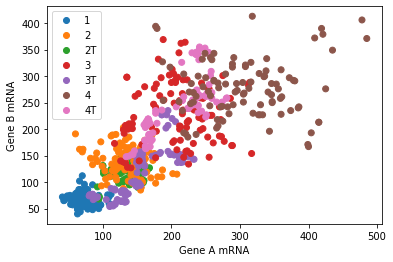

In [15]:
#scatter of 2 genes
plt.scatter(
     data[data.columns[0]],
     data[data.columns[1]],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=0, marker = "o") for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)
plt.ylabel('Gene B mRNA')
plt.xlabel('Gene A mRNA')
plt.savefig('Exp1/TwoState_mRNA.pdf')

In [16]:
sim1  = lt.LTSim(c1, 2, gene_csv='data/toy_data/two_gene_cell_cycle.csv', mol_csv ='data/toy_data/two_gene_cell_cycle_molecule_count.csv',count_csv = 'count.csv',sample_csv = 'Exp1/samples2StateProt.csv', molecule = "protein")

In [17]:
data = sim1.sim_LT(100)

1T
1
2T
2
3T
3
4T
4


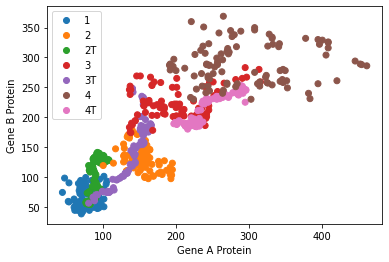

In [18]:
#scatter of 2 genes
plt.scatter(
     data[data.columns[0]],
     data[data.columns[1]],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=0, marker = "o") for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)
plt.ylabel('Gene B Protein')
plt.xlabel('Gene A Protein')
plt.savefig('Exp1/TwoState_prot.pdf')

In [19]:
for i in range(4):
    plt.plot(a[i],np.divide(a[i],b[i])**2,'o')

plt.xlabel('Mean')
plt.ylabel('CV-Squared')
plt.legend(['Cell Type 1', 'Cell Type 2', 'Cell Type 3', 'Cell Type 4'])

NameError: name 'a' is not defined

# Exp 2

<h2>100 Gene System Data Generation</h2>

### Constitutive Expression

In [30]:
### Creating 100 Gene spec files for simulator

genes = [['Gene '+str(i),'constitutive', 'gene', 2, 'mRNA', 0, 'protein', 0] for i in range(100)]
reactions = [[gene[0],'constitutive',0,0, 'transcription',2.11,'mRNA decay',0.00245,'translation',0.00293,'protein decay',0.003] for gene in genes]
pd.DataFrame(reactions).to_csv('Exp2/Constitutive100Gene.csv', header = False, index = False)
pd.DataFrame(genes).to_csv('Exp2/Constitutive100GeneCount.csv', header = False, index = False)



<h3>2 State Model</h3>

In [24]:
### Creating 100 Gene spec files for simulator

genes = [['Gene '+str(i),'two-state', 'gene on', 2, 'gene off', 0, 'mRNA', 0, 'protein', 0] for i in range(100)]
reactions = [[gene[0],'two-state',0,0,'gene on',0.0282,'gene off',0.609,'transcription',2.11,'mRNA decay',0.00245,'translation',0.00293,'protein decay',0.003] for gene in genes]
pd.DataFrame(reactions).to_csv('Exp2/2State100Gene.csv', header = False, index = False)
pd.DataFrame(genes).to_csv('Exp2/2State100GeneCount.csv', header = False, index = False)



In [23]:
cell_type_csv = 'Exp2/2State100GeneCellTypes.csv'
cell_type_csv2 = 'Exp2/Constitutive100GeneCellTypes.csv'
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
celltypes2 = [['Gene','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [2.11*(np.random.random()+celltype-.5)  for _ in range(100)]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.00245,0.00293,0.003,celltype])
        celltypes2.append([gene[0], (.0282/(.0282+.609))*samp[idx],0.00245,0.00293,0.003,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)
pd.DataFrame(celltypes2).to_csv(cell_type_csv2, header = False, index = False)

## Simulating Data
### Constitutive

In [31]:
### Testing cellType creation
cell_type_csv = 'Exp2/Constitutive100GeneCellTypes.csv'
c4 = ct.CellType(4,cell_type_csv,[]) #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4]) 
c2 = ct.CellType(2,cell_type_csv,[]) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3]) 
 
c1.children[1].children[0].lineageName #should output 4
c4.rxn_rates

{'Gene 0': {'transcription': 0.3369098610301699,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 1': {'transcription': 0.3410076324517552,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 2': {'transcription': 0.3324185438331772,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 3': {'transcription': 0.3475017179167325,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 4': {'transcription': 0.3692999720959475,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 5': {'transcription': 0.4106704744539555,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 6': {'transcription': 0.3954390420356634,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 7': {'transcription': 0.3759968744139818,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein 

In [32]:
sim1  = lt.LTSim(c1, 100, gene_csv='Exp2/Constitutive100Gene.csv', mol_csv ='Exp2/Constitutive100GeneCount.csv',count_csv = 'count.csv',sample_csv = 'Exp2/samplesConstitutive.csv', molecule = "mRNA")
data = sim1.sim_LT(100)

1T
1
2T
2
3T
3
4T
4


In [ ]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [41]:
data = pd.read_csv('Exp2/samplesConstitutive.csv', index_col = 0, header = None)
reducer = umap.UMAP()
embedding = reducer.fit_transform(data[data.columns[:-1]])

In [44]:
data = pd.read_csv('Exp2/samplesConstitutive.csv', index_col = 0, header = None)
scaled_data = StandardScaler().fit_transform(data[data.columns[:-1]])
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

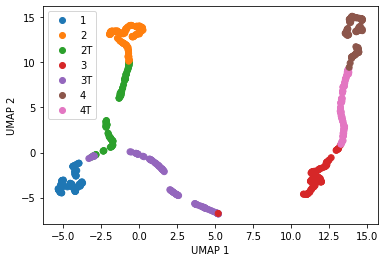

In [45]:
#UMAP of protein from simulator
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=0, marker = "o") for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.savefig("Exp2/Constitutive.pdf")

### Histograms

In [17]:
data = pd.read_csv('Exp2/samplesConstitutive.csv', index_col = 0, header = None)
a = []
b= []
for i in range(1,5):
    a.append([])
    b.append([])
    a[i-1] = np.mean(data[data.columns[:-1]][data[data.columns[-1]] == str(i)])
    b[i-1] = np.std(data[data.columns[:-1]][data[data.columns[-1]] == str(i)])

In [79]:
x= []
models = []
for i in range(4):
    x.append([[samp] for samp in a[i]])
    models.append(LinearRegression())
    models[i].fit(x[i], np.divide(a[i],b[i])**2)
    

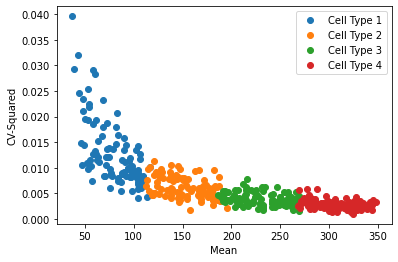

In [18]:
for i in range(4):
    plt.plot(a[i],np.divide(b[i],a[i])**2,'o')
    #print(spearmanr(a[i],np.divide(a[i],b[i])**2))
   
#for i in range(4):
    #plt.plot(x[i],models[i].predict(x[i]),'k')

plt.xlabel('Mean')
plt.ylabel('CV-Squared')
plt.legend(['Cell Type 1', 'Cell Type 2', 'Cell Type 3', 'Cell Type 4'])
plt.savefig('Exp2/CV2_Constitutive.pdf')

## Simulating Data
### Two State

In [43]:
### Testing cellType creation
cell_type_csv = 'Exp2/2State100GeneCellTypes.csv'
c4 = ct.CellType(4,cell_type_csv,[]) #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4]) 
c2 = ct.CellType(2,cell_type_csv,[]) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3]) 
 
c1.children[1].children[0].lineageName #should output 4
c4.rxn_rates

{'Gene 0': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 7.612729200298735,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 1': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 7.705321397101362,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 2': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 7.511244543634772,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 3': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 7.852060094203615,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 4': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 8.344607880125453,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 5': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 9.27940518872555,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0

In [44]:
sim1  = lt.LTSim(c1, 100, gene_csv='Exp2/2State100Gene.csv', mol_csv ='Exp2/2State100GeneCount.csv',count_csv = 'count.csv',sample_csv = 'Exp2/samples2State.csv', molecule = "mRNA")
data = sim1.sim_LT(100)

1T
1
2T
2
3T
3
4T
4


In [50]:
data = pd.read_csv('Exp2/samples2State.csv', index_col = 0, header = None)
reducer = umap.UMAP()
embedding = reducer.fit_transform(data[data.columns[:-1]])

In [42]:
data = pd.read_csv('Exp2/samples2State.csv', index_col = 0, header = None)
scaled_data = StandardScaler().fit_transform(data[data.columns[:-1]])
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

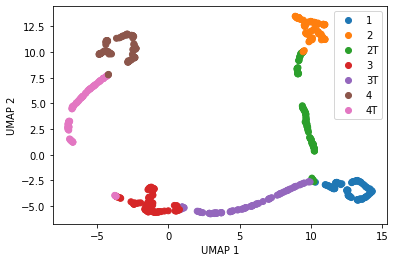

In [43]:
#UMAP of protein from simulator
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=0, marker = "o") for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.savefig("Exp2/2State.pdf")

### Histograms

In [19]:
data = pd.read_csv('Exp2/samples2State.csv', index_col = 0, header = None)
a = []
b= []
for i in range(1,5):
    a.append([])
    b.append([])
    a[i-1] = np.mean(data[data.columns[:-1]][data[data.columns[-1]] == str(i)])
    b[i-1] = np.std(data[data.columns[:-1]][data[data.columns[-1]] == str(i)])

In [79]:
x= []
models = []
for i in range(4):
    x.append([[samp] for samp in a[i]])
    models.append(LinearRegression())
    models[i].fit(x[i], np.divide(a[i],b[i])**2)
    

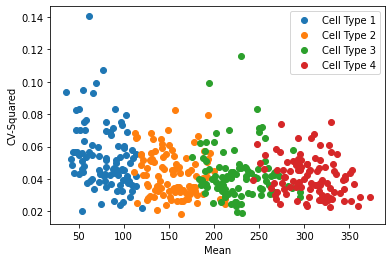

In [20]:
for i in range(4):
    plt.plot(a[i],np.divide(b[i],a[i])**2,'o')
    #print(spearmanr(a[i],np.divide(a[i],b[i])**2))
   
#for i in range(4):
    #plt.plot(x[i],models[i].predict(x[i]),'k')

plt.xlabel('Mean')
plt.ylabel('CV-Squared')
plt.legend(['Cell Type 1', 'Cell Type 2', 'Cell Type 3', 'Cell Type 4'])
plt.savefig('Exp2/CV2_2State.pdf')

# Exp 3

<h2>100 Gene System Data Generation</h2>
 More Complex Tree

### Constitutive Expression

In [53]:
### Creating 100 Gene spec files for simulator

genes = [['Gene '+str(i),'constitutive', 'gene', 2, 'mRNA', 0, 'protein', 0] for i in range(100)]
reactions = [[gene[0],'constitutive',0,0, 'transcription',2.11,'mRNA decay',0.00245,'translation',0.00293,'protein decay',0.003] for gene in genes]
pd.DataFrame(reactions).to_csv('Exp3/Constitutive100Gene.csv', header = False, index = False)
pd.DataFrame(genes).to_csv('Exp3/Constitutive100GeneCount.csv', header = False, index = False)



<h3>2 State Model</h3>

In [54]:
### Creating 100 Gene spec files for simulator

genes = [['Gene '+str(i),'two-state', 'gene on', 2, 'gene off', 0, 'mRNA', 0, 'protein', 0] for i in range(100)]
reactions = [[gene[0],'two-state',0,0,'gene on',0.0282,'gene off',0.609,'transcription',2.11,'mRNA decay',0.00245,'translation',0.00293,'protein decay',0.003] for gene in genes]
pd.DataFrame(reactions).to_csv('Exp3/2State100Gene.csv', header = False, index = False)
pd.DataFrame(genes).to_csv('Exp3/2State100GeneCount.csv', header = False, index = False)



In [55]:
cell_type_csv = 'Exp3/2State100GeneCellTypes.csv'
cell_type_csv2 = 'Exp3/Constitutive100GeneCellTypes.csv'
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
celltypes2 = [['Gene','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,6):
    samp = [1.11*(np.random.random()+celltype-.5)  for _ in range(100)]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.00245,0.00293,0.003,celltype])
        celltypes2.append([gene[0], (.0282/(.0282+.609))*samp[idx],0.00245,0.00293,0.003,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)
pd.DataFrame(celltypes2).to_csv(cell_type_csv2, header = False, index = False)

## Simulating Data
### Constitutive

In [4]:
### Testing cellType creation
cell_type_csv = 'Exp3/Constitutive100GeneCellTypes.csv'
c5 = ct.CellType(5,cell_type_csv,[])
c4 = ct.CellType(4,cell_type_csv,[]) 
c3 = ct.CellType(3,cell_type_csv,[c4,c5]) 
c2 = ct.CellType(2,cell_type_csv,[]) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3]) 
 
c1.children[1].children[0].lineageName #should output 4
c5.rxn_rates

{'Gene 0': {'transcription': 0.2393280778231032,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 1': {'transcription': 0.2324852745990902,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 2': {'transcription': 0.2385929041835512,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 3': {'transcription': 0.2344674481709484,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 4': {'transcription': 0.2407785441546419,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 5': {'transcription': 0.2371431888733932,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 6': {'transcription': 0.2277451233637535,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 7': {'transcription': 0.234952270492089,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein d

In [11]:
sim1  = lt.LTSim(c1, 100, gene_csv='Exp3/Constitutive100Gene.csv', mol_csv ='Exp3/Constitutive100GeneCount.csv',count_csv = 'count.csv',sample_csv = 'Exp3/samplesConstitutive.csv', molecule = "mRNA")
data = sim1.sim_LT(50)

1T
1
2T
2
3T
3
4T
4
5T
5


In [12]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [16]:
data = pd.read_csv('Exp3/samplesConstitutive.csv', index_col = 0, header = None)
reducer = umap.UMAP()
embedding = reducer.fit_transform(data[data.columns[:-1]])

In [17]:
data = pd.read_csv('Exp3/samplesConstitutive.csv', index_col = 0, header = None)
scaled_data = StandardScaler().fit_transform(data[data.columns[:-1]])
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

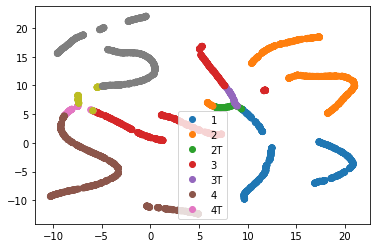

In [18]:
#UMAP of protein from simulator
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6, "5":7, "5T": 8 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=0, marker = "o") for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)

## Simulating Data
### Two State

In [63]:
### Testing cellType creation
cell_type_csv = 'Exp3/2State100GeneCellTypes.csv'
c5 = ct.CellType(5,cell_type_csv,[])
c4 = ct.CellType(4,cell_type_csv,[]) 
c3 = ct.CellType(3,cell_type_csv,[c4,c5]) 
c2 = ct.CellType(2,cell_type_csv,[]) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3]) 
 
c1.children[1].children[0].lineageName #should output 4
c5.rxn_rates

{'Gene 0': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 5.407796141449694,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 1': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 5.2531779068985935,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 2': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 5.391184345594287,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 3': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 5.297966594841431,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 4': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 5.440570508345314,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay': 0.003},
 'Gene 5': {'gene on': 0.0282,
  'gene off': 0.609,
  'transcription': 5.358426948586034,
  'mRNA decay': 0.00245,
  'translation': 0.00293,
  'protein decay':

In [64]:
sim1  = lt.LTSim(c1, 100, gene_csv='Exp3/2State100Gene.csv', mol_csv ='Exp3/2State100GeneCount.csv',count_csv = 'count.csv',sample_csv = 'Exp3/samples2State.csv', molecule = "mRNA")
data = sim1.sim_LT(100)

1T
1
2T
2
3T
3
4T
4
5T
5


In [19]:
data = pd.read_csv('Exp3/samples2State.csv', index_col = 0, header = None)
reducer = umap.UMAP()
embedding = reducer.fit_transform(data[data.columns[:-1]])

In [48]:
data = pd.read_csv('Exp3/samples2State.csv', index_col = 0, header = None)
scaled_data = StandardScaler().fit_transform(data[data.columns[:-1]])
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

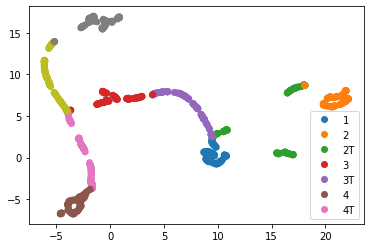

In [20]:
#UMAP of protein from simulator
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6,"5":7, "5T": 8  })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=0, marker = "o") for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)

### cellType creation 1
    Changing 30% of genes between simulations
    Base State:
        M5
    Other States
        Transcription .5-1.5x 

In [5]:
cell_type_csv = 'data/toy_data/100GenesSimpleCellTypes.csv'
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [7.11*(np.random.random()+.5) if r else 7.11 for r in np.random.random(100)<.3]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.1299,0.3299,0.00245,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)

4

### cellType creation 2
    Changing 50% of genes between simulations
    Base State:
        M5
    Other States
        2: Transcription 1-2x 
        3: Transcription 2-3x 
        4: Transcription 3-4x 

In [5]:
### Testing cellType creation
#this time we try changing 50% of all genes in each cell type mutliplying by:
    #1-2 for celltype 2
    #2-3 for celltype 3
    #3-4 for celltype 4
    
    #samples2.csv

cell_type_csv = 'data/toy_data/100GenesSimpleCellTypestest2.csv'
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [7.11*(np.random.random()+(celltype-1)) if (r and celltype!=1) else 7.11 for r in np.random.random(100)<.5]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.1299,0.3299,0.00245,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)


4

### CellType creation 3
    Changing 100% of genes between CellTypes
    Base State:
        M5
    Other States
        2: Transcription 2-4x 
        3: Transcription 4-6x 
        4: Transcription 6-8x 

In [4]:
### Testing cellType creation w. mRNA
#this time we try changing 100% of all genes in each cell type mutliplying by:
    #2-4 for celltype 2
    #4-6 for celltype 3
    #6-8 for celltype 4
    
    #samples2.csv

cell_type_csv = 'data/toy_data/100GenesSimpleCellTypestest3.csv'
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [7.11*2*(np.random.random()+(celltype-1)) if (r and celltype!=1) else 7.11 for r in np.random.random(100)<1]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.1299,0.3299,0.00245,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)


4

# 100 Genes Protein Simulation

In [5]:
cell_type_csv = 'data/toy_data/100GenesSimpleCellTypestest3.csv' #add cell type csv here
c4 = ct.CellType(4,cell_type_csv,[]) #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4]) 
c2 = ct.CellType(2,cell_type_csv,[]) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3]) 

sim1  = lt.LTSim(c1, 100, gene_csv='data/toy_data/100GenesSimpleRxns.csv', mol_csv ='data/toy_data/100GenesSimple.csv',count_csv = 'count.csv',sample_csv = 'samplesProt.csv')

In [6]:
data = sim1.sim_LT(100)

1T
1
2T
2
3T
3
4T
4


### UMAP of Samples

In [34]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [10]:
scaled_data = StandardScaler().fit_transform(data[data.columns[:-1]])
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

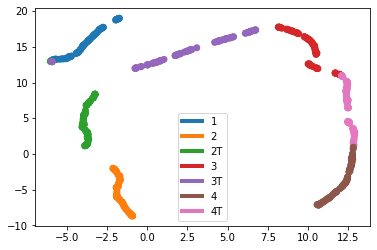

In [11]:
#UMAP of protein from simulator
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=4) for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)

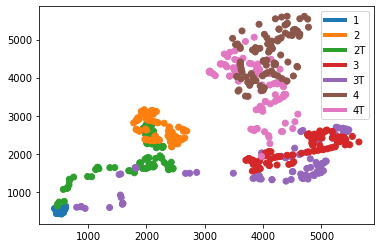

In [12]:
#scatter of 2 genes
plt.scatter(
    data[data.columns[1]],
     data[data.columns[2]],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=4) for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)

### CV-squared vs Mean

In [47]:
a = []
b= []
for i in range(1,5):
    a.append([])
    b.append([])
    a[i-1] = np.mean(data[data.columns[1:-1]][data[data.columns[-1]] == str(i)])
    b[i-1] = np.std(data[data.columns[1:-1]][data[data.columns[-1]] == str(i)])

In [79]:
x= []
models = []
for i in range(4):
    x.append([[samp] for samp in a[i]])
    models.append(LinearRegression())
    models[i].fit(x[i], np.divide(a[i],b[i])**2)
    

SpearmanrResult(correlation=0.4605617280706627, pvalue=1.4245482209910784e-06)
SpearmanrResult(correlation=0.23562026888875592, pvalue=0.018279474656492472)
SpearmanrResult(correlation=0.4361035353030121, pvalue=5.7494481042514625e-06)
SpearmanrResult(correlation=0.5212436881022203, pvalue=2.6950575259961748e-08)


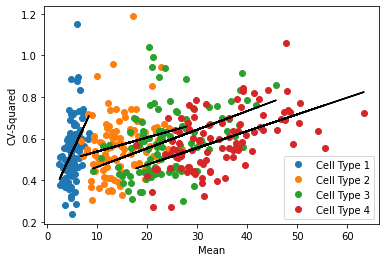

In [86]:
for i in range(4):
    plt.plot(a[i],np.divide(a[i],b[i])**2,'o')
    print(spearmanr(a[i],np.divide(a[i],b[i])**2))
   
for i in range(4):
    plt.plot(x[i],models[i].predict(x[i]),'k')

plt.xlabel('Mean')
plt.ylabel('CV-Squared')
plt.legend(['Cell Type 1', 'Cell Type 2', 'Cell Type 3', 'Cell Type 4'])